In [70]:
%load_ext autoreload
%autoreload 2
import os; import sys;sys.path.append("..")
import socceraction.classification.features as fs
import socceraction.classification.labels as lab
import pandas as pd
import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
games = pd.read_hdf("../data/spadl.h5","games")
actiontypes = pd.read_hdf("../data/spadl.h5", "actiontypes")
bodyparts = pd.read_hdf("../data/spadl.h5", "bodyparts")
results = pd.read_hdf("../data/spadl.h5", "results")

In [2]:
games = pd.read_hdf("../data/spadl.h5","games")
games[:4]

/home/tomd/software/miniconda3/envs/soccer/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,attendance,away_team_id,competition_id,duration,game_date,game_id,home_team_id,matchday,referee_id,season_id,venue_id
37,45517,175,23,96,2017-12-10 15:15:00,942948,185,15,42055,2017,2476
43,11767,140,24,94,2017-08-06 15:00:00,920528,2128,1,42021,2017,3400
21,12000,413,112,95,2017-08-11 18:30:00,917587,2052,3,43824,2017,3312
0,19279,135,21,95,2016-12-04 14:00:00,879320,603,15,40448,2016,2698


In [72]:
game_id = games.game_id[0]
actions = pd.read_hdf("../data/spadl.h5",f"actions/game_{game_id}")
actions = (
    actions.merge(actiontypes)
    .merge(results)
    .merge(bodyparts)
    .sort_values(["period_id", "time_seconds", "timestamp"])
    .reset_index(drop=True)
)

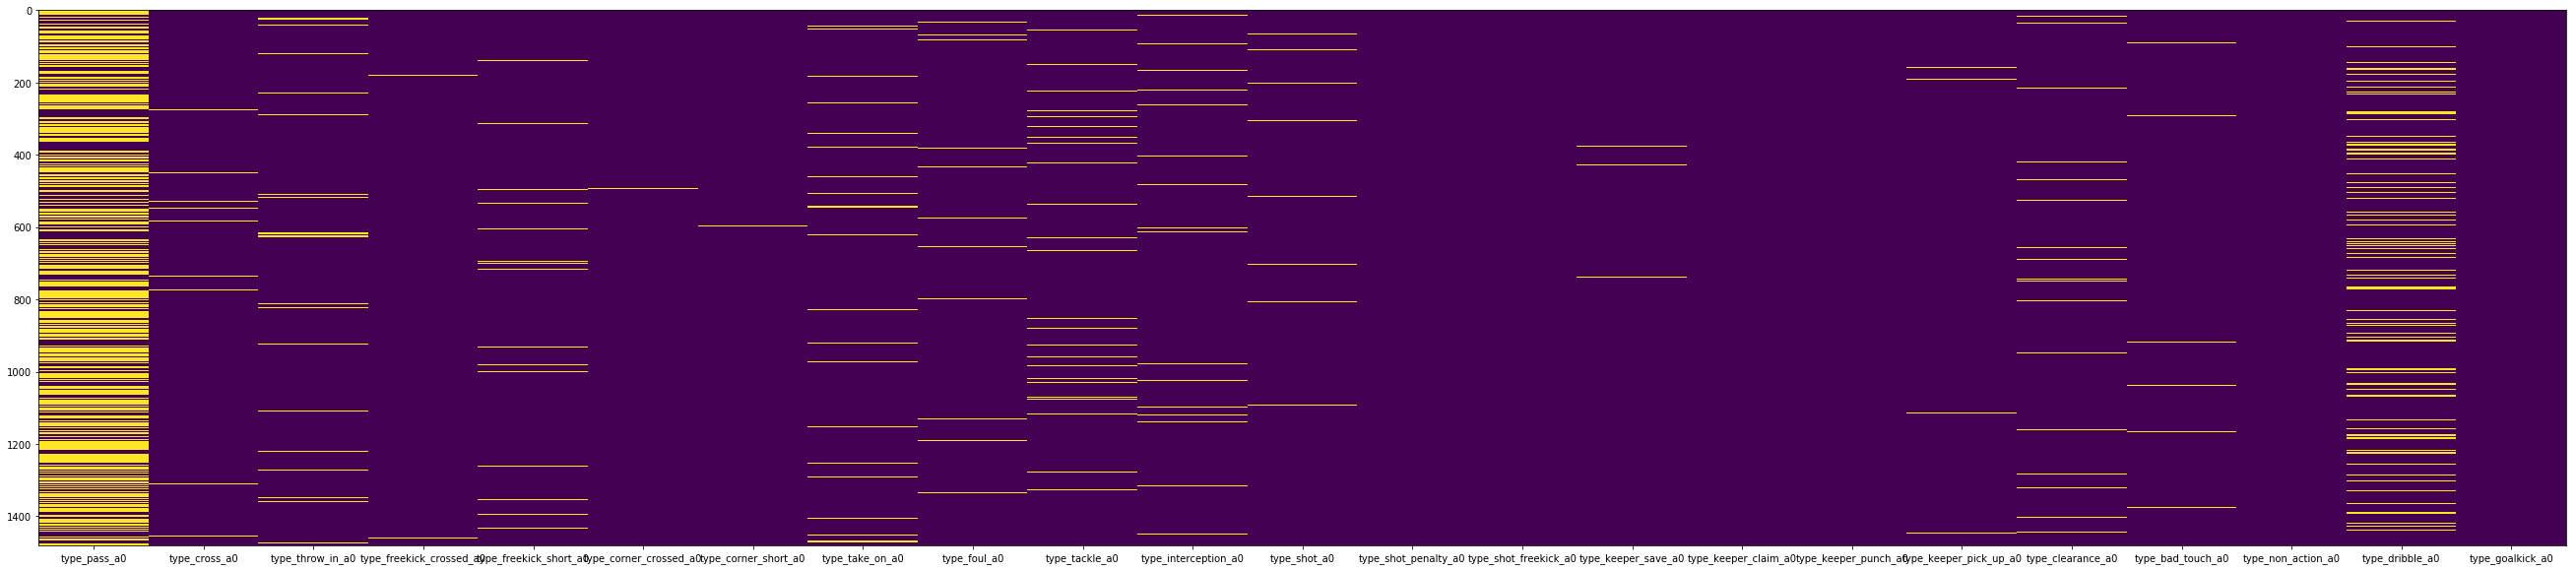

In [77]:
import matplotlib.pyplot as plt

a = actions
f = fs.actiontype(a)
fo = fs.actiontype_onehot(a)

#f = fs.result([a])
#fo = fs.result_onehot([a])

#fo = fs.actiontype_onehot(fs.gamestates(a,3))
#f = fs.bodypart([a])
#fo = fs.bodypart_onehot([a])

#fo = fs.goalscore([a])

plt.imshow(fo.values,aspect='auto')
plt.xticks(range(len(fo.columns)),fo.columns)
plt.gcf().set_size_inches(len(fo.columns)*2,10)
plt.show()

In [82]:
fs.movement(fs.gamestates(actions,2))

,dx_a0,dy_a0,movement_a0,dx_a1,dy_a1,movement_a1
0,19.950,-5.304,20.643036,19.950,-5.304,20.643036
1,-48.510,32.028,58.129277,19.950,-5.304,20.643036
2,-5.985,3.060,6.721891,-48.510,32.028,58.129277
3,0.000,0.000,0.000000,-5.985,3.060,6.721891
4,21.315,-6.664,22.332445,0.000,0.000,0.000000
5,-6.930,-14.960,16.487162,21.315,-6.664,22.332445
6,8.295,-21.964,23.478167,-6.930,-14.960,16.487162
7,23.520,-6.868,24.502241,8.295,-21.964,23.478167
8,9.555,-9.860,13.730172,23.520,-6.868,24.502241
9,25.620,7.344,26.651805,9.555,-9.860,13.730172


In [69]:
cols = fs.feature_column_names([fs.polar],1)
X[cols]

,start_dist_to_goal_a0,start_tan_angle_to_goal_a0,end_dist_to_goal_a0,end_tan_angle_to_goal_a0
0,52.396589,128.419118,73.950118,8.115325
1,73.950118,8.115325,79.099825,5.700176
2,79.099825,5.700176,38.697680,0.543529
3,87.901784,2.384118,69.586223,2.354779
4,69.586223,2.354779,63.510881,2.449592
5,49.434447,2.071854,41.481459,2.865452
6,39.966450,2.642817,39.966450,2.642817
7,67.248895,4.624965,35.581954,1.450535
8,35.581954,1.450535,39.110501,1.785901
9,39.110501,1.785901,37.549403,1.202925
